In [81]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [82]:
# Calculating porosity for the Xiong Wei paper

x_w_mm = 38.1
y_w_mm = 11
z_w_mm = 0.1
xyz_w_mmc = x_w_mm * y_w_mm * z_w_mm

o_r_mm = 0.02
x_r_mm = x_w_mm
y_r_mm = y_w_mm + (2 * o_r_mm)
z_r_mm = z_w_mm + (2 * o_r_mm)
xyz_r_mmc = x_r_mm * y_r_mm * z_r_mm
xyz_r_mmc = xyz_r_mmc - xyz_w_mmc

xyz_wr_mmc = xyz_r_mmc + xyz_w_mmc

xyz_w_pct = (xyz_w_mmc / xyz_wr_mmc) * 100
xyz_r_pct = (xyz_r_mmc / xyz_wr_mmc) * 100

print(f"The water volume = {round(xyz_w_mmc, 1)} mm^3")
print(f"The rock volume = {round(xyz_r_mmc, 1)} mm^3")
print(f"The total volume = {round(xyz_wr_mmc, 1)} mm^3")
print(f"The water volume = {round(xyz_w_pct, 1)} %")
print(f"The rock volume = {round(xyz_r_pct, 1)} %")
print(f"Porosity = {round(xyz_w_pct, 1)} %")

The water volume = 41.9 mm^3
The rock volume = 17.0 mm^3
The total volume = 58.9 mm^3
The water volume = 71.2 %
The rock volume = 28.8 %
Porosity = 71.2 %


# 2022-06-07_bfm_3-0 (Flood Basalt) (Liu Setup Parameters)

In [83]:
def data_cats(directory):
    os.chdir(directory)
    f_list = glob('*.csv')
    f_list = [i.rstrip('.csv') for i in f_list]
    f_list = [i.rstrip('0123456789') for i in f_list]
    f_set = set(f_list)
    output_total = len(f_list) / len(f_set)
    return f_set, int(output_total)

In [84]:
def time_finder(in_file_path):
    with open(in_file_path) as f:
        t = f.read().strip()
    m = re.findall(r"^spatial_profile.+?$", t, re.MULTILINE)
    m = m[0]
    m = m.split()
    m = m[1:]
    m.append("1E-12")
    m_float = [float(x) for x in m]
    return m_float

In [85]:
# Iterate through all the files in order, generating dataframes that need compiling.
def csv_dfer(directory, in_file_path):
    catList, max_time = data_cats(directory)
    times = time_finder(in_file_path)
    metric_final_dataframes = []
    for _ in catList:
        metric_dataframes = []
        for __,___ in zip(range(max_time), times):
            df = pd.read_csv(directory + "/" + str(_) + str(__+1) + ".csv")
            df["timestep"] = str(___)
            metric_dataframes.append(df)
        df = pd.concat(metric_dataframes)
        df["metric"] = str(_)
        metric_final_dataframes.append(df)
    final_df = pd.concat(metric_final_dataframes)
    return final_df

In [86]:
infile_path_FB = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/crunchflow_work/bfm/2022-06-07_bfm_3-0_1D-LS_FB/basalt.in"

directory_path_FB = (infile_path_FB.replace('/basalt.in','')) + "/tec2csv"

df_FB = csv_dfer(directory_path_FB, infile_path_FB)

In [87]:
df_FB

,X,Y,Z,pH,timestep,metric,Tortuosity,Diopside,Diopside_a,Hedenbergite,...,HSiO3-,KCl(aq),KOH(aq),MgCl+,NaCl(aq),NaHSiO3(aq),NaOH(aq),X Velocity,Y-Velocity,Z-Velocity
0,0.125,5.52,0.07,4.131818,0.0001,pH,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.375,5.52,0.07,3.867408,0.0001,pH,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.625,5.52,0.07,3.672459,0.0001,pH,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.875,5.52,0.07,3.592733,0.0001,pH,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.125,5.52,0.07,3.571758,0.0001,pH,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,36.875,5.52,0.07,NaN,280.0,affinity_term,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,37.125,5.52,0.07,NaN,280.0,affinity_term,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,37.375,5.52,0.07,NaN,280.0,affinity_term,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,37.625,5.52,0.07,NaN,280.0,affinity_term,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df_FB = df_FB.replace(to_replace=r'^\d+\.\d+-\d+$', value='0', regex=True)

# 1.0 - Dodd Model Data

In [89]:
df = df_FB.filter(["X", "timestep", "metric", "Siderite"])
df = df.dropna(axis=0)
df = df[df["metric"] == "volume"]

In [90]:
def df_interpreter(df, week):
    df = df[df["timestep"] == week]
    x = (df.X).astype(float)
    y = df["Siderite"].astype(float)
    return x, y

In [91]:
x_fb_dodd_6week_DistMm, y_fb_dodd_6week_VolFracDecPct = df_interpreter(df, "42.0")
x_fb_dodd_12week_DistMm, y_fb_dodd_12week_VolFracDecPct = df_interpreter(df, "84.0")
x_fb_dodd_20week_DistMm, y_fb_dodd_20week_VolFracDecPct = df_interpreter(df, "140.0")
x_fb_dodd_30week_DistMm, y_fb_dodd_30week_VolFracDecPct = df_interpreter(df, "210.0")
x_fb_dodd_40week_DistMm, y_fb_dodd_40week_VolFracDecPct = df_interpreter(df, "280.0")

In [92]:
y_fb_dodd_6week_VolFracPct = y_fb_dodd_6week_VolFracDecPct * 100
y_fb_dodd_12week_VolFracPct = y_fb_dodd_12week_VolFracDecPct * 100
y_fb_dodd_20week_VolFracPct = y_fb_dodd_20week_VolFracDecPct * 100
y_fb_dodd_30week_VolFracPct = y_fb_dodd_30week_VolFracDecPct * 100
y_fb_dodd_40week_VolFracPct = y_fb_dodd_40week_VolFracDecPct * 100

In [93]:
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

In [94]:
max_vals = []
list_of_Xs = [y_fb_dodd_6week_VolFracPct, y_fb_dodd_12week_VolFracPct, y_fb_dodd_20week_VolFracPct, y_fb_dodd_30week_VolFracPct, y_fb_dodd_40week_VolFracPct]
for _ in list_of_Xs:
    max_vals.append(max(_))
max_value = max(max_vals)

In [95]:
y_lower = 0
y_higher = max_value

y_fb_dodd_6week_VolFracPct_norm = NormalizeData(np.array(y_fb_dodd_6week_VolFracPct), y_lower, y_higher)
y_fb_dodd_12week_VolFracPct_norm = NormalizeData(np.array(y_fb_dodd_12week_VolFracPct), y_lower, y_higher)
y_fb_dodd_20week_VolFracPct_norm = NormalizeData(np.array(y_fb_dodd_20week_VolFracPct), y_lower, y_higher)
y_fb_dodd_30week_VolFracPct_norm = NormalizeData(np.array(y_fb_dodd_30week_VolFracPct), y_lower, y_higher)
y_fb_dodd_40week_VolFracPct_norm = NormalizeData(np.array(y_fb_dodd_40week_VolFracPct), y_lower, y_higher)

# 1.1 - Xiong Model Data - Siderite

In [96]:
fb_xiong_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/crunchflow_work/Xiong_data/FB_modelled.csv"
fb_xiong_df = pd.read_csv(fb_xiong_path)

In [97]:
def df_interpreter(df, week):
    df = df[df["Week"] == week]
    x = (df.Distance).astype(float)
    y = df["Volume_Fraction"].astype(float)
    return x, y

In [98]:
x_fb_xiong_6week_DistMm, y_fb_xiong_6week_VolFracPct = df_interpreter(fb_xiong_df, "6week")
x_fb_xiong_12week_DistMm, y_fb_xiong_12week_VolFracPct = df_interpreter(fb_xiong_df, "12week")
x_fb_xiong_20week_DistMm, y_fb_xiong_20week_VolFracPct = df_interpreter(fb_xiong_df, "20week")
x_fb_xiong_30week_DistMm, y_fb_xiong_30week_VolFracPct = df_interpreter(fb_xiong_df, "30week")
x_fb_xiong_40week_DistMm, y_fb_xiong_40week_VolFracPct = df_interpreter(fb_xiong_df, "40week")

In [99]:
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

In [100]:
max_vals = []
list_of_Xs = [y_fb_xiong_6week_VolFracPct, y_fb_xiong_12week_VolFracPct, y_fb_xiong_20week_VolFracPct, y_fb_xiong_30week_VolFracPct, y_fb_xiong_40week_VolFracPct]
for _ in list_of_Xs:
    max_vals.append(max(_))
max_value = max(max_vals)

In [101]:
y_lower = 0
y_higher = max_value

y_fb_xiong_6week_VolFracPct_norm = NormalizeData(np.array(y_fb_xiong_6week_VolFracPct), y_lower, y_higher)
y_fb_xiong_12week_VolFracPct_norm = NormalizeData(np.array(y_fb_xiong_12week_VolFracPct), y_lower, y_higher)
y_fb_xiong_20week_VolFracPct_norm = NormalizeData(np.array(y_fb_xiong_20week_VolFracPct), y_lower, y_higher)
y_fb_xiong_30week_VolFracPct_norm = NormalizeData(np.array(y_fb_xiong_30week_VolFracPct), y_lower, y_higher)
y_fb_xiong_40week_VolFracPct_norm = NormalizeData(np.array(y_fb_xiong_40week_VolFracPct), y_lower, y_higher)

# 1.2 - Xiong vs Dodd Models - Siderite

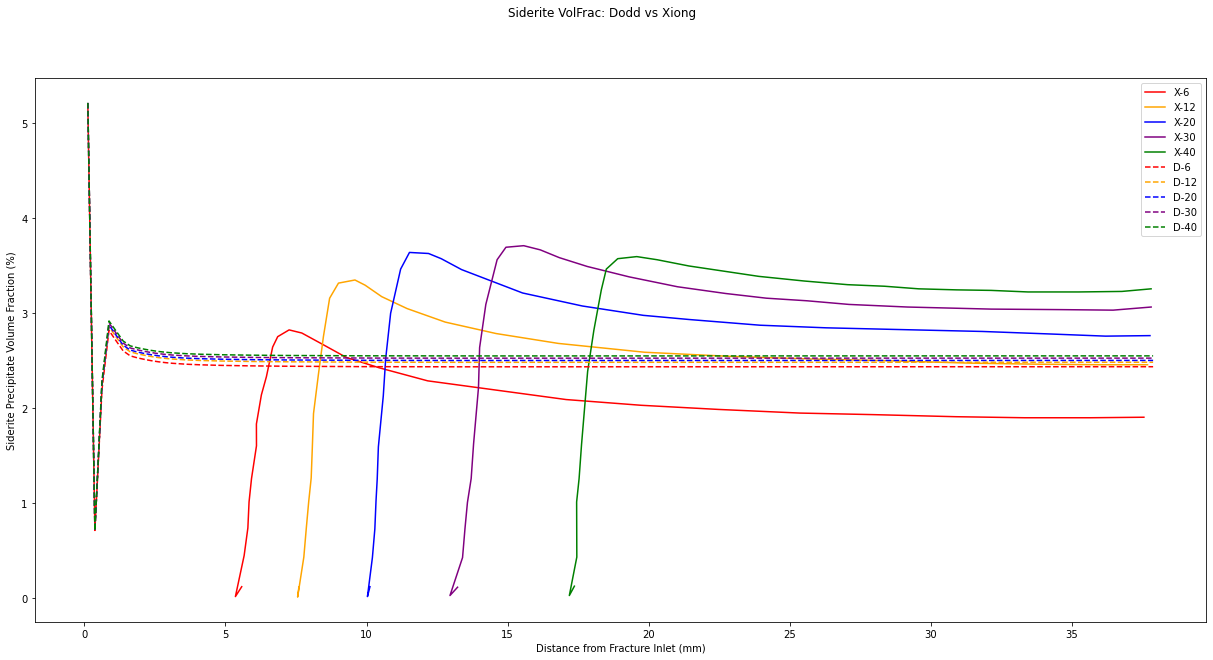

In [102]:
fig, ax1 = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)
fig.suptitle("Siderite VolFrac: Dodd vs Xiong")
ax1.plot(x_fb_xiong_6week_DistMm, y_fb_xiong_6week_VolFracPct, c="red", label="X-6")
ax1.plot(x_fb_xiong_12week_DistMm, y_fb_xiong_12week_VolFracPct, c="orange", label="X-12")
ax1.plot(x_fb_xiong_20week_DistMm, y_fb_xiong_20week_VolFracPct, c="blue", label="X-20")
ax1.plot(x_fb_xiong_30week_DistMm, y_fb_xiong_30week_VolFracPct, c="purple", label="X-30")
ax1.plot(x_fb_xiong_40week_DistMm, y_fb_xiong_40week_VolFracPct, c="green", label="X-40")
ax1.plot(x_fb_dodd_6week_DistMm, y_fb_dodd_6week_VolFracPct, c="red", label="D-6", linestyle="--")
ax1.plot(x_fb_dodd_12week_DistMm, y_fb_dodd_12week_VolFracPct, c="orange", label="D-12", linestyle="--")
ax1.plot(x_fb_dodd_20week_DistMm, y_fb_dodd_20week_VolFracPct, c="blue", label="D-20", linestyle="--")
ax1.plot(x_fb_dodd_30week_DistMm, y_fb_dodd_30week_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_DistMm, y_fb_dodd_40week_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Siderite Precipitate Volume Fraction (%)")
plt.legend()

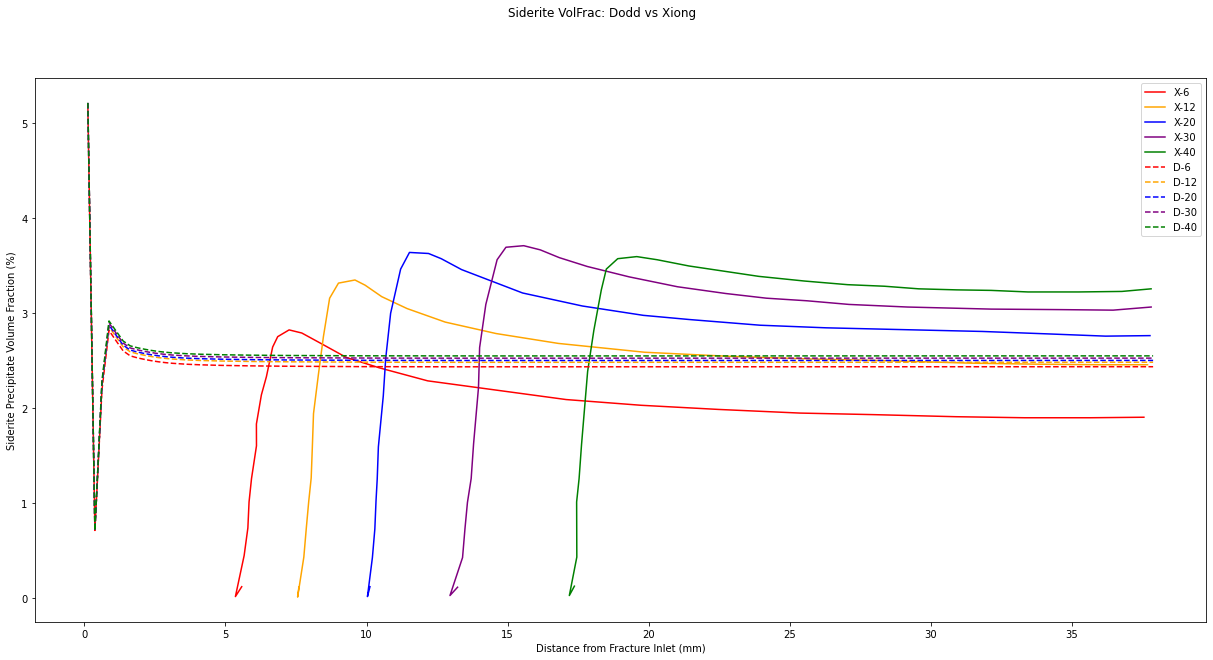

In [103]:
fig, ax1 = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)
fig.suptitle("Siderite VolFrac: Dodd vs Xiong")
ax1.plot(x_fb_xiong_6week_DistMm, y_fb_xiong_6week_VolFracPct, c="red", label="X-6")
ax1.plot(x_fb_xiong_12week_DistMm, y_fb_xiong_12week_VolFracPct, c="orange", label="X-12")
ax1.plot(x_fb_xiong_20week_DistMm, y_fb_xiong_20week_VolFracPct, c="blue", label="X-20")
ax1.plot(x_fb_xiong_30week_DistMm, y_fb_xiong_30week_VolFracPct, c="purple", label="X-30")
ax1.plot(x_fb_xiong_40week_DistMm, y_fb_xiong_40week_VolFracPct, c="green", label="X-40")
ax1.plot(x_fb_dodd_6week_DistMm, y_fb_dodd_6week_VolFracPct, c="red", label="D-6", linestyle="--")
ax1.plot(x_fb_dodd_12week_DistMm, y_fb_dodd_12week_VolFracPct, c="orange", label="D-12", linestyle="--")
ax1.plot(x_fb_dodd_20week_DistMm, y_fb_dodd_20week_VolFracPct, c="blue", label="D-20", linestyle="--")
ax1.plot(x_fb_dodd_30week_DistMm, y_fb_dodd_30week_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_DistMm, y_fb_dodd_40week_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Siderite Precipitate Volume Fraction (%)")
plt.legend()

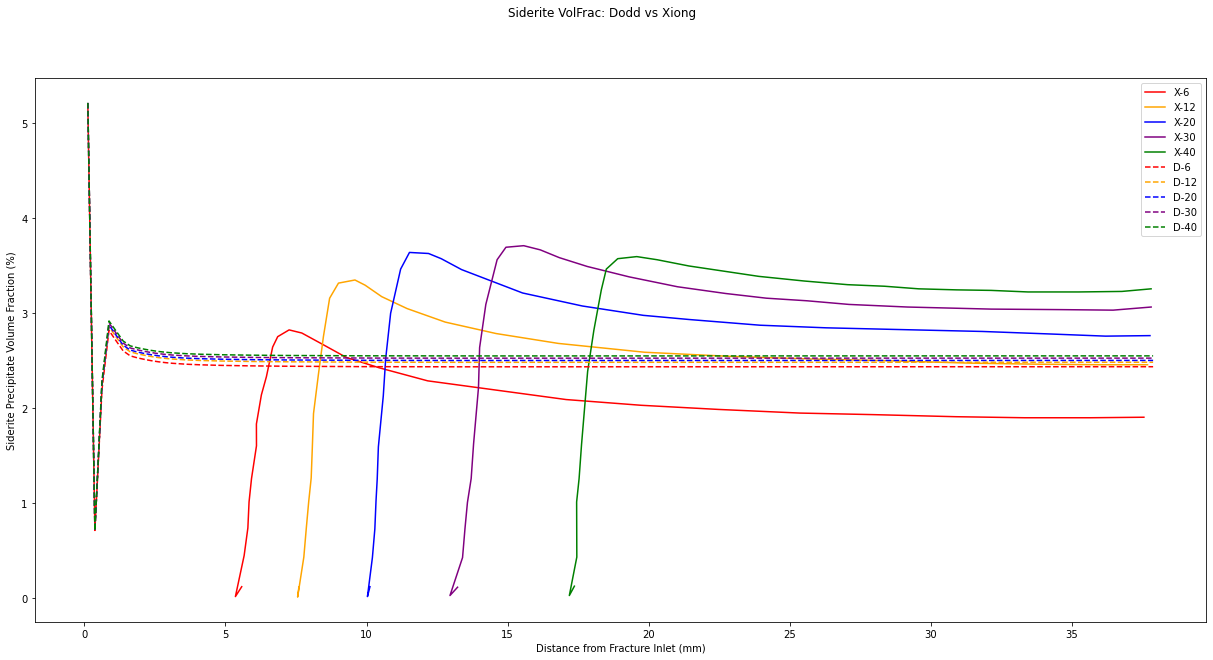

In [104]:
fig, ax1 = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)
fig.suptitle("Siderite VolFrac: Dodd vs Xiong")
ax1.plot(x_fb_xiong_6week_DistMm, y_fb_xiong_6week_VolFracPct, c="red", label="X-6")
ax1.plot(x_fb_xiong_12week_DistMm, y_fb_xiong_12week_VolFracPct, c="orange", label="X-12")
ax1.plot(x_fb_xiong_20week_DistMm, y_fb_xiong_20week_VolFracPct, c="blue", label="X-20")
ax1.plot(x_fb_xiong_30week_DistMm, y_fb_xiong_30week_VolFracPct, c="purple", label="X-30")
ax1.plot(x_fb_xiong_40week_DistMm, y_fb_xiong_40week_VolFracPct, c="green", label="X-40")
ax1.plot(x_fb_dodd_6week_DistMm, y_fb_dodd_6week_VolFracPct, c="red", label="D-6", linestyle="--")
ax1.plot(x_fb_dodd_12week_DistMm, y_fb_dodd_12week_VolFracPct, c="orange", label="D-12", linestyle="--")
ax1.plot(x_fb_dodd_20week_DistMm, y_fb_dodd_20week_VolFracPct, c="blue", label="D-20", linestyle="--")
ax1.plot(x_fb_dodd_30week_DistMm, y_fb_dodd_30week_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_DistMm, y_fb_dodd_40week_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Siderite Precipitate Volume Fraction (%)")
plt.legend()

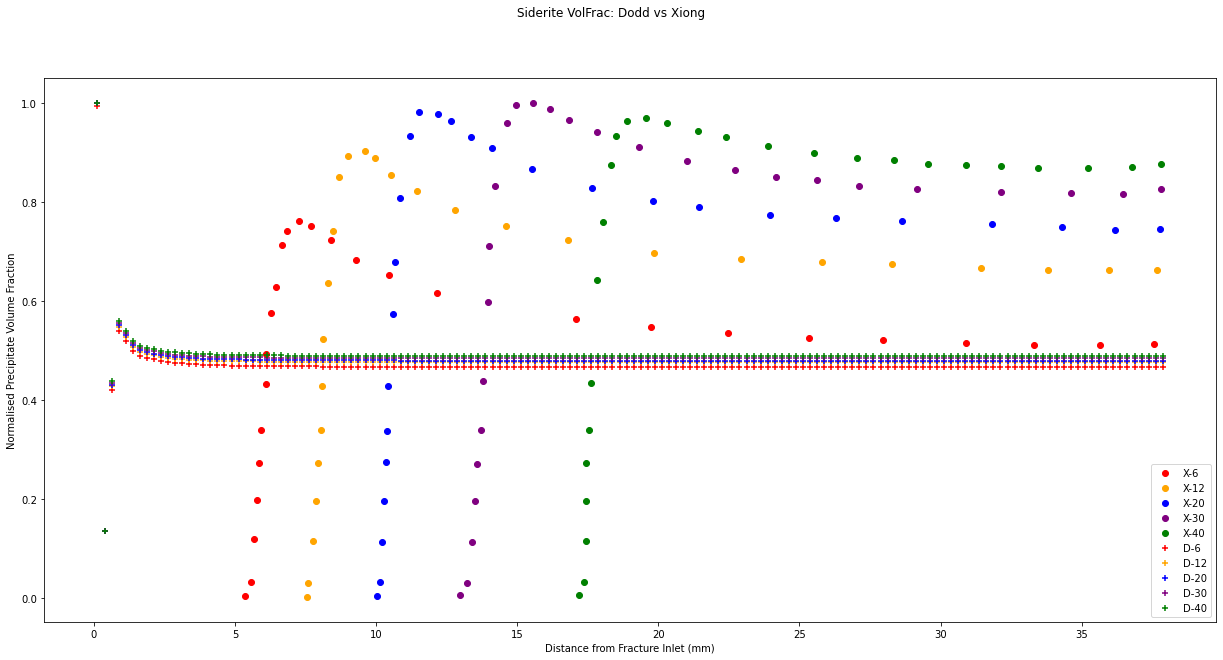

In [105]:
fig, ax1 = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)
fig.suptitle("Siderite VolFrac: Dodd vs Xiong")
ax1.scatter(x=x_fb_xiong_6week_DistMm, y=y_fb_xiong_6week_VolFracPct_norm, c="red", label="X-6")
ax1.scatter(x=x_fb_xiong_12week_DistMm, y=y_fb_xiong_12week_VolFracPct_norm, c="orange", label="X-12")
ax1.scatter(x=x_fb_xiong_20week_DistMm, y=y_fb_xiong_20week_VolFracPct_norm, c="blue", label="X-20")
ax1.scatter(x=x_fb_xiong_30week_DistMm, y=y_fb_xiong_30week_VolFracPct_norm, c="purple", label="X-30")
ax1.scatter(x=x_fb_xiong_40week_DistMm, y=y_fb_xiong_40week_VolFracPct_norm, c="green", label="X-40")
ax1.scatter(x=x_fb_dodd_6week_DistMm, y=y_fb_dodd_6week_VolFracPct_norm, c="red", label="D-6", marker="+")
ax1.scatter(x=x_fb_dodd_12week_DistMm, y=y_fb_dodd_12week_VolFracPct_norm, c="orange", label="D-12", marker="+")
ax1.scatter(x=x_fb_dodd_20week_DistMm, y=y_fb_dodd_20week_VolFracPct_norm, c="blue", label="D-20", marker="+")
ax1.scatter(x=x_fb_dodd_30week_DistMm, y=y_fb_dodd_30week_VolFracPct_norm, c="purple", label="D-30", marker="+")
ax1.scatter(x=x_fb_dodd_40week_DistMm, y=y_fb_dodd_40week_VolFracPct_norm, c="green", label="D-40", marker="+")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Normalised Precipitate Volume Fraction")
plt.legend()

# 2.0 - Dodd Model Data - Carbonates

In [106]:
df = df_FB.filter(["X", "timestep", "metric", "Calcite", "Siderite", "Magnesite"])
df = df.dropna(axis=0)
df = df[df["metric"] == "volume"]
df['Carbonates'] = df['Calcite'].astype(float) + df['Siderite'].astype(float) + df['Magnesite'].astype(float)
df

,X,timestep,metric,Calcite,Siderite,Magnesite,Carbonates
0,0.125,0.0001,volume,9.929132e-11,1.000158e-10,9.999998e-11,2.993071e-10
1,0.375,0.0001,volume,9.848494e-11,9.993929e-11,9.999998e-11,2.984242e-10
2,0.625,0.0001,volume,9.804268e-11,9.989502e-11,9.999998e-11,2.979377e-10
3,0.875,0.0001,volume,9.791619e-11,9.988271e-11,9.999998e-11,2.977989e-10
4,1.125,0.0001,volume,9.789174e-11,9.988036e-11,9.999998e-11,2.977721e-10
...,...,...,...,...,...,...,...
147,36.875,280.0,volume,1.715458e-02,2.548154e-02,8.831738e-11,4.263613e-02
148,37.125,280.0,volume,1.715466e-02,2.548155e-02,8.831543e-11,4.263621e-02
149,37.375,280.0,volume,1.715472e-02,2.548155e-02,8.831397e-11,4.263627e-02
150,37.625,280.0,volume,1.715476e-02,2.548155e-02,8.831299e-11,4.263631e-02


In [107]:
def df_interpreter(df, week):
    df = df[df["timestep"] == week]
    x = (df.X).astype(float)
    y = df["Carbonates"].astype(float)
    return x, y

In [108]:
x_fb_dodd_6week_Carb_DistMm, y_fb_dodd_6week_Carb_VolFracDecPct = df_interpreter(df, "42.0")
x_fb_dodd_12week_Carb_DistMm, y_fb_dodd_12week_Carb_VolFracDecPct = df_interpreter(df, "84.0")
x_fb_dodd_20week_Carb_DistMm, y_fb_dodd_20week_Carb_VolFracDecPct = df_interpreter(df, "140.0")
x_fb_dodd_30week_Carb_DistMm, y_fb_dodd_30week_Carb_VolFracDecPct = df_interpreter(df, "210.0")
x_fb_dodd_40week_Carb_DistMm, y_fb_dodd_40week_Carb_VolFracDecPct = df_interpreter(df, "280.0")

In [109]:
y_fb_dodd_6week_Carb_VolFracPct = y_fb_dodd_6week_Carb_VolFracDecPct.astype(float) * 100
y_fb_dodd_12week_Carb_VolFracPct = y_fb_dodd_12week_Carb_VolFracDecPct.astype(float) * 100
y_fb_dodd_20week_Carb_VolFracPct = y_fb_dodd_20week_Carb_VolFracDecPct.astype(float) * 100
y_fb_dodd_30week_Carb_VolFracPct = y_fb_dodd_30week_Carb_VolFracDecPct.astype(float) * 100
y_fb_dodd_40week_Carb_VolFracPct = y_fb_dodd_40week_Carb_VolFracDecPct.astype(float) * 100

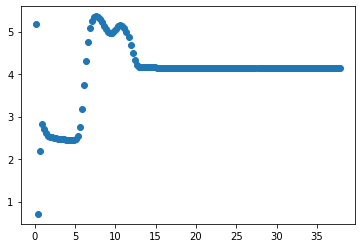

In [110]:
fig, ax1 = plt.subplots(1)
ax1.scatter(x_fb_dodd_6week_Carb_DistMm, y_fb_dodd_6week_Carb_VolFracPct)

In [111]:
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

In [112]:
max_vals = []
list_of_Xs = [y_fb_dodd_6week_Carb_VolFracPct, y_fb_dodd_12week_Carb_VolFracPct, y_fb_dodd_20week_Carb_VolFracPct, y_fb_dodd_30week_Carb_VolFracPct, y_fb_dodd_40week_Carb_VolFracPct]
for _ in list_of_Xs:
    max_vals.append(max(_))
max_value = max(max_vals)

In [113]:
y_lower = 0
y_higher = max_value

y_fb_dodd_6week_Carb_VolFracPct_norm = NormalizeData(y_fb_dodd_6week_Carb_VolFracPct, y_lower, y_higher)
y_fb_dodd_12week_Carb_VolFracPct_norm = NormalizeData(y_fb_dodd_12week_Carb_VolFracPct, y_lower, y_higher)
y_fb_dodd_20week_Carb_VolFracPct_norm = NormalizeData(y_fb_dodd_20week_Carb_VolFracPct, y_lower, y_higher)
y_fb_dodd_30week_Carb_VolFracPct_norm = NormalizeData(y_fb_dodd_30week_Carb_VolFracPct, y_lower, y_higher)
y_fb_dodd_40week_Carb_VolFracPct_norm = NormalizeData(y_fb_dodd_40week_Carb_VolFracPct, y_lower, y_higher)

# 2.1 - Xiong Experimental Data - Carbonates

In [114]:
fb_xiong_path = "/Users/thomasdodd/Library/CloudStorage/OneDrive-MillfieldEnterprisesLimited/cambridge/ai4er/easter/mres/crunchflow_work/Xiong_data/FB_40weeks.csv"
fb_xiong_df = pd.read_csv(fb_xiong_path)

In [115]:
def df_interpreter(df, volume_fraction):
    x = df.Dist
    y = df[volume_fraction]
    return x, y

In [116]:
x_xiong_fb_dist_mm, y_xiong_fb_VolFrac = df_interpreter(fb_xiong_df, "Volume_Fraction")
x_xiong_fb_dist_mm_NpArr = np.array(x_xiong_fb_dist_mm)
y_xiong_fb_VolFrac_NpArr = np.array(y_xiong_fb_VolFrac)

In [117]:
def NormalizeData(data, lower, upper):
    return (data - lower) / (upper - lower)

In [118]:
lower = 0
upper = max(y_xiong_fb_VolFrac_NpArr)
y_xiong_fb_VolFrac_norm = NormalizeData(y_xiong_fb_VolFrac_NpArr, lower, upper)

# 2.2 - Dodd Model vs Xiong Experimental - Carbonates

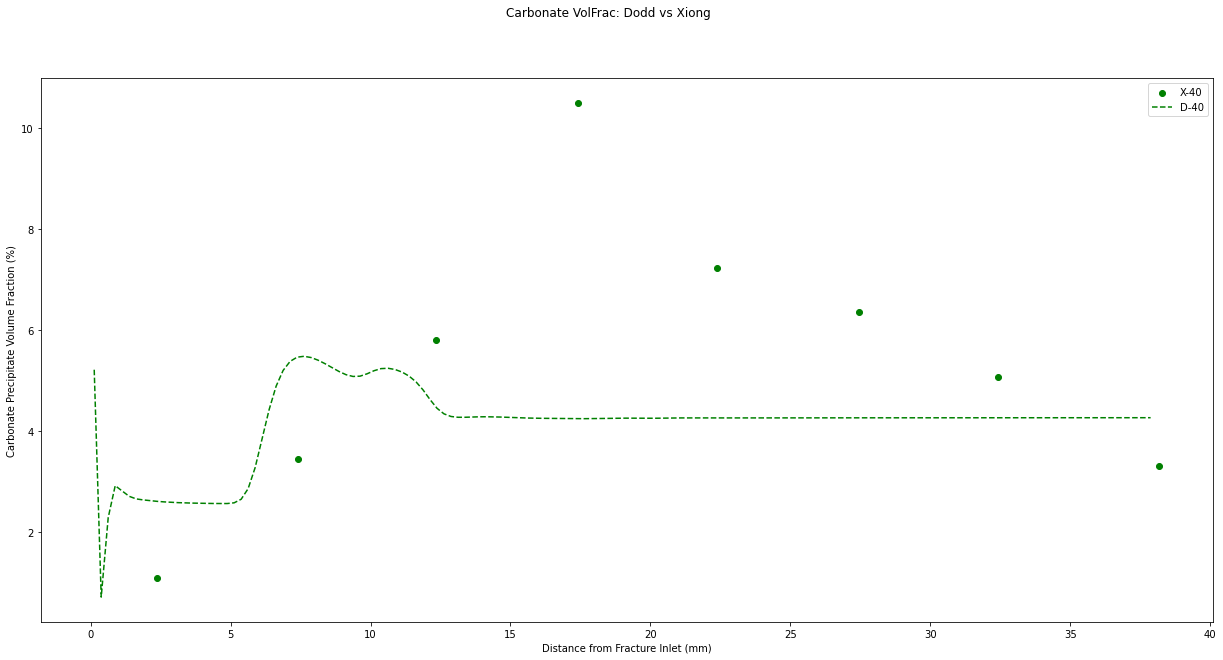

In [120]:
# Liu's Background Fluid
fig, ax1 = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)
fig.suptitle("Carbonate VolFrac: Dodd vs Xiong")
ax1.scatter(x=x_xiong_fb_dist_mm_NpArr, y=y_xiong_fb_VolFrac_NpArr, c="green", label="X-40")
# ax1.plot(x_fb_dodd_6week_Carb_DistMm, y_fb_dodd_6week_Carb_VolFracPct, c="red", label="D-6", linestyle="--")
# ax1.plot(x_fb_dodd_12week_Carb_DistMm, y_fb_dodd_12week_Carb_VolFracPct, c="orange", label="D-12", linestyle="--")
# ax1.plot(x_fb_dodd_20week_Carb_DistMm, y_fb_dodd_20week_Carb_VolFracPct, c="blue", label="D-20", linestyle="--")
# ax1.plot(x_fb_dodd_30week_Carb_DistMm, y_fb_dodd_30week_Carb_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_Carb_DistMm, y_fb_dodd_40week_Carb_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Carbonate Precipitate Volume Fraction (%)")
plt.legend()

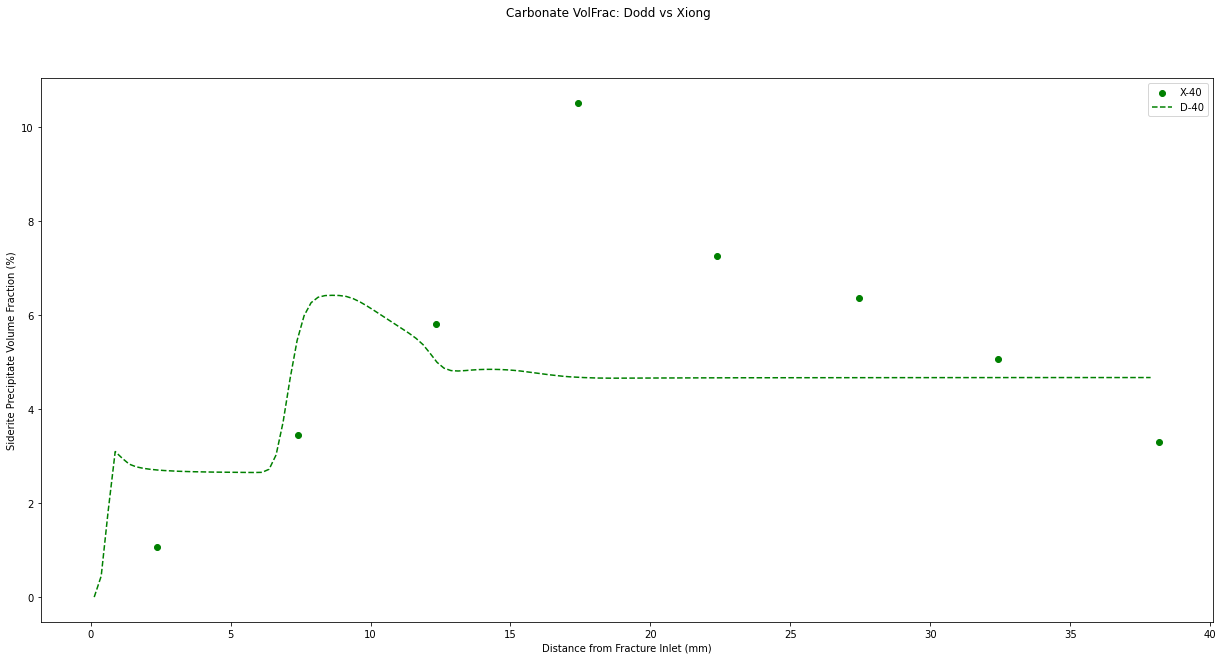

In [80]:
# Liu's Injectate Fluid
fig, ax1 = plt.subplots(1)
fig.set_figheight(10)
fig.set_figwidth(21)
fig.suptitle("Carbonate VolFrac: Dodd vs Xiong")
ax1.scatter(x=x_xiong_fb_dist_mm_NpArr, y=y_xiong_fb_VolFrac_NpArr, c="green", label="X-40")
# ax1.plot(x_fb_dodd_6week_Carb_DistMm, y_fb_dodd_6week_Carb_VolFracPct, c="red", label="D-6", linestyle="--")
# ax1.plot(x_fb_dodd_12week_Carb_DistMm, y_fb_dodd_12week_Carb_VolFracPct, c="orange", label="D-12", linestyle="--")
# ax1.plot(x_fb_dodd_20week_Carb_DistMm, y_fb_dodd_20week_Carb_VolFracPct, c="blue", label="D-20", linestyle="--")
# ax1.plot(x_fb_dodd_30week_Carb_DistMm, y_fb_dodd_30week_Carb_VolFracPct, c="purple", label="D-30", linestyle="--")
ax1.plot(x_fb_dodd_40week_Carb_DistMm, y_fb_dodd_40week_Carb_VolFracPct, c="green", label="D-40", linestyle="--")
ax1.set_xlabel("Distance from Fracture Inlet (mm)")
ax1.set_ylabel("Carbonate Precipitate Volume Fraction (%)")
plt.legend()